# **Sentiment Analysis**

Geeksforgeeks Data Science tutorial: https://www.geeksforgeeks.org/extracting-tweets-containing-a-particular-hashtag-using-python/

**Description:** 

This is a sentiment analysis program that parses the tweets fetched from Twitter using Python.

## **1.   Introduction: Importing libraries and set Twitter API**

In [ ]:
# Import all needed libraries
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook

import pandas as pd
pd.set_option('display.max_colwidth', None) #to see more text
import json 
import csv
from datetime import date
from datetime import datetime
import time
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()

from textblob import TextBlob
from wordcloud import WordCloud
import string
import itertools
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/path/to/data'

Mounted at /content/gdrive


In [ ]:
# Twitter API credentials

api_key = 'vpBT5zCco120S5VkWGeq0jbU3'
api_secret_key = 'nIk59NQikAS9kug5GcOkWuEqOqbAr1UgRhn5H77T9OiCdeEo7m'
access_token = '1362326919157583873-3NVcDUiiEBUsZGe06A7HzCTAs1tEDb'
access_token_secret = 'Y0Wrzi23jYd0TiAe9tNqQHax3PFqBrPRg2N2KQCl0rVtJ'


In [ ]:
# Connect to Twitter API using the secrets
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
# Helper function to save data into a JSON file
# file_name: the file name of the data on Google Drive
# file_content: the data you want to save
def save_json(file_name, file_content):
  with open(path + file_name, 'w', encoding='utf-8') as f:
    json.dump(file_content, f, ensure_ascii=False, indent=4)

In [ ]:
# Helper function to handle twitter API rate limit
def limit_handled(cursor, list_name):
  while True:
    try:
      yield cursor.next()
    # Catch Twitter API rate limit exception and wait for 15 minutes
    except tweepy.RateLimitError:
      print("\nData points in list = {}".format(len(list_name)))
      print('Hit Twitter API rate limit.')
      for i in range(3, 0, -1):
        print("Wait for {} mins.".format(i * 5))
        time.sleep(5 * 60)
    # Catch any other Twitter API exceptions
    except tweepy.error.TweepError:
      print('\nCaught TweepError exception' )

## **2.   The program to get Tweets and characterics from a specific Hashtag**


In [ ]:
# Python Script to Extract tweets of a
# particular Hashtag using Tweepy and Pandas


# import modules
import pandas as pd
import tweepy

api = tweepy.API(auth,wait_on_rate_limit=True)

# function to perform data extraction
def scrape(words, date_since, numtweet):
	
	# Creating DataFrame using pandas
	db = pd.DataFrame(columns=['username', 'description', 'location', 'following',
							'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'])
	
	# We are using .Cursor() to search through twitter for the required tweets.
	# The number of tweets can be restricted using .items(number of tweets)
	tweets = tweepy.Cursor(api.search, q=words, lang="en",
						since=date_since, count=200, tweet_mode='extended').items(numtweet)
	
	# .Cursor() returns an iterable object. Each item in
	# the iterator has various attributes that you can access to
	# get information about each tweet
	list_tweets = [tweet for tweet in tweets]
	
	# Counter to maintain Tweet Count
	i = 1
	
	# we will iterate over each tweet in the list for extracting information about each tweet
	for tweet in list_tweets:
		username = tweet.user.screen_name
		description = tweet.user.description
		location = tweet.user.location
		following = tweet.user.friends_count
		followers = tweet.user.followers_count
		totaltweets = tweet.user.statuses_count
		retweetcount = tweet.retweet_count
		hashtags = tweet.entities['hashtags']
		
		# Retweets can be distinguished by a retweeted_status attribute,
		# in case it is an invalid reference, except block will be executed
		try:
			text = tweet.retweeted_status.full_text
		except AttributeError:
			text = tweet.full_text
		hashtext = list()
		for j in range(0, len(hashtags)):
			hashtext.append(hashtags[j]['text'])
		
		# Here we are appending all the extracted information in the DataFrame
		ith_tweet = [username, description, location, following,
					followers, totaltweets, retweetcount, text, hashtext]
		db.loc[len(db)] = ith_tweet
		i = i+1
	filename = 'scraped_tweets.csv'
	
	# we will save our database as a CSV file.
	db.to_csv(filename)

In [ ]:
if __name__ == '__main__':
	
	# Enter Hashtag and initial date
	print("Enter Twitter HashTag to search for")
	words = input()
	print("Enter Date since The Tweets are required in yyyy-mm--dd")
	date_since = input()
	
	# number of tweets you want to extract in one run
	numtweet = 3000
	scrape(words, date_since, numtweet)
	print('Scraping has completed!')

Enter Twitter HashTag to search for
BottegaVeneta
Enter Date since The Tweets are required in yyyy-mm--dd
2015-01-01
Scraping has completed!


In [ ]:
df_bv = pd.read_csv('/content/scraped_tweets.csv')

print(df_bv.shape)
df_bv.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,nyshoeaddict,"All things PR, marketing and events. Oh and full-time shoe lover.",NaN,1385,503,8595,0,"Once I become a #bitcoin millionaire, I will purchase one of these bags!\n\n#bottegaveneta #love\n\nhttps://t.co/YuyteCmazo","['bitcoin', 'bottegaveneta', 'love']"
1,1,DiscountTreasu1,"We have jewelry and clothing available at htttps://discountreasures.com We maintain a presence on Poshmark, eBay, Walmart, and Facebook. Come check us out!","Central Florida, FL",827,645,442,1,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #bottegaveneta #hannaandersson #victoriassecret: https://t.co/79Fckg34f1 https://t.co/wtTondhbtq,"['poshmark', 'fashion', 'style', 'shopmycloset']"
2,2,lux_shopper,Personal Shopper. Luxury Brands. Fashion Enthusiast❤,NaN,257,259,210,0,"""The ones pretending not to see you, are the ones taking all the notes.""\n#bottegaveneta #bottegavenetashoes https://t.co/f5G1UFzTls","['bottegaveneta', 'bottegavenetashoes']"
3,3,OurBeautifulFi1,Reselling,NaN,0,1,1098,0,So good I had to share! Check out all the items I'm loving on @Poshmarkapp from @jabryan21 #poshmark #fashion #style #shopmycloset #relic #bottegaveneta #rocciaelastomere: https://t.co/4Fgb2uArSh https://t.co/VJJlI3Kz52,"['poshmark', 'fashion', 'style', 'shopmycloset', 'relic', 'bottegaveneta', 'rocciaelastomere']"
4,4,green_eyez1910,🇩🇪🇧🇷 ❤️ 🇺🇸,NaN,152,19,958,0,Say hello to my birthday bag 😍. Arrived just in time ❤️ #BottegaVeneta #LoveIsNotTourism https://t.co/dZZ2BbrpBW,"['BottegaVeneta', 'LoveIsNotTourism']"


In [ ]:
if __name__ == '__main__':
	
	# Enter Hashtag and initial date
	print("Enter Twitter HashTag to search for")
	words = input()
	print("Enter Date since The Tweets are required in yyyy-mm--dd")
	date_since = input()
	
	# number of tweets you want to extract in one run
	numtweet = 3000
	scrape(words, date_since, numtweet)
	print('Scraping has completed!')

Enter Twitter HashTag to search for
Gucci
Enter Date since The Tweets are required in yyyy-mm--dd
2015-01-01
Scraping has completed!


In [ ]:
df_gu = pd.read_csv('/content/scraped_tweets.csv')

print(df_gu.shape)
df_gu.head()

(3000, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,mileyclegend,"plastic hearts is aoty \n\nstan list: miley cyrus, billie eilish, lana, adele, lewis capaldi, stevie nicks, pink floyd and many rock bands",NaN,424,1143,37563,0,@MarkRonson @gucci We need Miley x Mark collab ❣️,[]
1,1,nishaatjo,here for a good time not a long time,NaN,669,414,8673,2817,LOVE PARADE ❤️💕 @gucci https://t.co/FhftK410y1,[]
2,2,LuccaLazaro,Fab 5 Freddy told me everybody’s flyyy,Silicon Valley,2102,637,5463,3,Idk how they’re gonna steam all the piss from Hollywood Blvd off the Gucci but good luck to ‘em,[]
3,3,Lovelylismaria,"~ Life, Love, Liberty & the Freedom to be Fabulous ~ IG: lisamaria82✌🏾#SpiritualCityGirl💋🌇🏙🌃🛍✨🛍",illadelPhi.a,777,241,28120,155,The rest of you filthy animals can take a seat because all eyes were on Macaulay Culkin at #Gucci's Love Parade. ♥️👏 See all the star-studded pics: https://t.co/sDwrtreTAZ https://t.co/Yjy03vRAQV,['Gucci']
4,4,RatchetttBarbie,$tay The F*ck Outta OUR Business.,Washington DC,546,981,20546,0,Why Is Shuggy Fat Ass Asking Me for Gucci 🤔 Like Where’s Your Job &amp; Old Ass Parents Ms. Girl,[]


In [ ]:
if __name__ == '__main__':
	
	# Enter Hashtag and initial date
	print("Enter Twitter HashTag to search for")
	words = input()
	print("Enter Date since The Tweets are required in yyyy-mm--dd")
	date_since = input()
	
	# number of tweets you want to extract in one run
	numtweet = 3000
	scrape(words, date_since, numtweet)
	print('Scraping has completed!')

Enter Twitter HashTag to search for
YSL
Enter Date since The Tweets are required in yyyy-mm--dd
2018-01-01
Scraping has completed!


In [ ]:
df_ysl = pd.read_csv('/content/scraped_tweets.csv')

print(df_ysl.shape)
df_ysl.head()

(3000, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,00s_ysl,sushi roll :D,yoongiverse,19,11,18621,0,when uncle was being super great dad to his children right infront,[]
1,1,blinkuechikin,#JISOO: What you see is not everything you know.,NaN,732,552,96556,2,shé posted the pcity pics when she went to met. yesterday she posted the ones from ysl flagship and tco. that pic must just be random or she’s really somewhere not in sk,[]
2,2,SODABlTCH,❌‼️DON’T FOLLOW ME BACK PEOPLE‼️❌,NaN,187,0,30472,190,ysl it girl\n\n#MAMAVOTE #rosé https://t.co/o97EY1grNl,"['MAMAVOTE', 'rosé']"
3,3,intakprint,@BLACKPINK @P1H_official @P1H_members🧩,mihyun♥ she/her,502,516,137924,2,shé posted the pcity pics when she went to met. yesterday she posted the ones from ysl flagship and tco. that pic must just be random or she’s really somewhere not in sk,[]
4,4,letmeloner,Now you’re dead and gone,NaN,143,56,23746,190,ysl it girl\n\n#MAMAVOTE #rosé https://t.co/o97EY1grNl,"['MAMAVOTE', 'rosé']"


In [ ]:
if __name__ == '__main__':
	
	# Enter Hashtag and initial date
	print("Enter Twitter HashTag to search for")
	words = input()
	print("Enter Date since The Tweets are required in yyyy-mm--dd")
	date_since = input()
	
	# number of tweets you want to extract in one run
	numtweet = 3000
	scrape(words, date_since, numtweet)
	print('Scraping has completed!')

Enter Twitter HashTag to search for
bottegaveneta
Enter Date since The Tweets are required in yyyy-mm--dd
2018-01-01
Scraping has completed!


In [ ]:
df_bv = pd.read_csv('/content/scraped_tweets.csv')

print(df_bv.shape)
df_bv.head()

(169, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,nyshoeaddict,"All things PR, marketing and events. Oh and full-time shoe lover.",NaN,1385,503,8595,0,"Once I become a #bitcoin millionaire, I will purchase one of these bags!\n\n#bottegaveneta #love\n\nhttps://t.co/YuyteCmazo","['bitcoin', 'bottegaveneta', 'love']"
1,1,DiscountTreasu1,"We have jewelry and clothing available at htttps://discountreasures.com We maintain a presence on Poshmark, eBay, Walmart, and Facebook. Come check us out!","Central Florida, FL",827,645,442,1,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #bottegaveneta #hannaandersson #victoriassecret: https://t.co/79Fckg34f1 https://t.co/wtTondhbtq,"['poshmark', 'fashion', 'style', 'shopmycloset']"
2,2,lux_shopper,Personal Shopper. Luxury Brands. Fashion Enthusiast❤,NaN,257,259,210,0,"""The ones pretending not to see you, are the ones taking all the notes.""\n#bottegaveneta #bottegavenetashoes https://t.co/f5G1UFzTls","['bottegaveneta', 'bottegavenetashoes']"
3,3,OurBeautifulFi1,Reselling,NaN,0,1,1098,0,So good I had to share! Check out all the items I'm loving on @Poshmarkapp from @jabryan21 #poshmark #fashion #style #shopmycloset #relic #bottegaveneta #rocciaelastomere: https://t.co/4Fgb2uArSh https://t.co/VJJlI3Kz52,"['poshmark', 'fashion', 'style', 'shopmycloset', 'relic', 'bottegaveneta', 'rocciaelastomere']"
4,4,green_eyez1910,🇩🇪🇧🇷 ❤️ 🇺🇸,NaN,152,19,958,0,Say hello to my birthday bag 😍. Arrived just in time ❤️ #BottegaVeneta #LoveIsNotTourism https://t.co/dZZ2BbrpBW,"['BottegaVeneta', 'LoveIsNotTourism']"


In [ ]:
# Clean the text

# Create a function to clean the tweets

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) #Revoming @mentions
  text = re.sub(r'#', '', text) # Removing the '#' simbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing the hyper link
  text = text.lower() # make text lowercase
  text = re.sub('\[.*?\]', '', text) # removing text within brackets
  text = re.sub('\(.*?\)', '', text) # removing text within parentheses
  text = re.sub('\w*\d\w*', '', text) # removing numbers
  text = re.sub('\s+', ' ', text) # if there's more than 1 whitespace, then make it just 1
  text = re.sub('\n', ' ', text) # if there's a new line, then make it a whitespace
  text = re.sub('\"+', '', text) # removing any quotes
  text = re.sub('(\&amp\;)', '', text) # removing &amp;
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Get rid of all punctuation
  text = re.sub('(httptco)', '', text) # getting rid of `httptco`
  text = re.sub(r'[^\w\s]', '',text) # remove other punctuation

  return text

# Cleaning the text
df_gu['text'] = df_gu['text'].apply(cleanTxt)
df_ysl['text'] = df_ysl['text'].apply(cleanTxt)
df_bv['text'] = df_bv['text'].apply(cleanTxt)

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df_gu['Subjectivity'] = df_gu['text'].apply(getSubjectivity)
df_gu['Polarity'] = df_gu['text'].apply(getPolarity)

df_ysl['Subjectivity'] = df_ysl['text'].apply(getSubjectivity)
df_ysl['Polarity'] = df_ysl['text'].apply(getPolarity)

df_bv['Subjectivity'] = df_bv['text'].apply(getSubjectivity)
df_bv['Polarity'] = df_bv['text'].apply(getPolarity)

In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df_gu['Analysis'] = df_gu['Polarity'].apply(getAnalysis)
df_ysl['Analysis'] = df_ysl['Polarity'].apply(getAnalysis)
df_bv['Analysis'] = df_bv['Polarity'].apply(getAnalysis)

In [ ]:
# Get the percentage of positive tweets
ptweets = df_gu[df_gu.Analysis == 'Positive']
ptweets = ptweets['text']

# Get the percentage of neutral tweets
nutweets = df_gu[df_gu.Analysis == 'Neutral']
nutweets = nutweets['text']

# Get the percentage of negative tweets
ngtweets = df_gu[df_gu.Analysis == 'Negative']
ngtweets = ngtweets['text']


print("% of positive tweets: ", round((ptweets.shape[0] / df_gu.shape[0])*100, 1))
print("% of neutral tweets: ", round((nutweets.shape[0] / df_gu.shape[0])*100, 1))
print("% of negative tweets: ", round((ngtweets.shape[0] / df_gu.shape[0])*100, 1))

% of positive tweets:  55.4
% of neutral tweets:  35.1
% of negative tweets:  9.5


In [ ]:
# Get the percentage of positive tweets
ptweets = df_ysl[df_ysl.Analysis == 'Positive']
ptweets = ptweets['text']

# Get the percentage of neutral tweets
nutweets = df_ysl[df_ysl.Analysis == 'Neutral']
nutweets = nutweets['text']

# Get the percentage of negative tweets
ngtweets = df_ysl[df_ysl.Analysis == 'Negative']
ngtweets = ngtweets['text']


print("% of positive tweets: ", round((ptweets.shape[0] / df_ysl.shape[0])*100, 1))
print("% of neutral tweets: ", round((nutweets.shape[0] / df_ysl.shape[0])*100, 1))
print("% of negative tweets: ", round((ngtweets.shape[0] / df_ysl.shape[0])*100, 1))

% of positive tweets:  19.8
% of neutral tweets:  77.7
% of negative tweets:  2.5


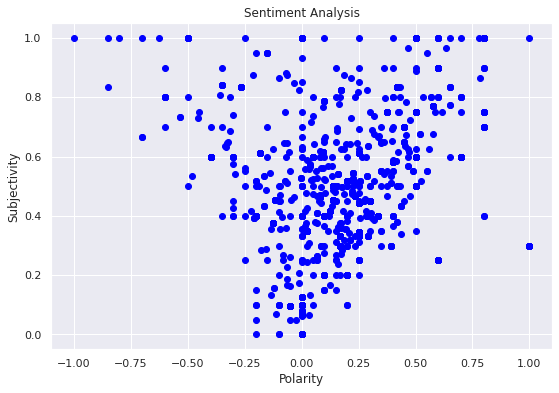

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df_gu.shape[0]):
  plt.scatter(df_gu['Polarity'][i], df_gu['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

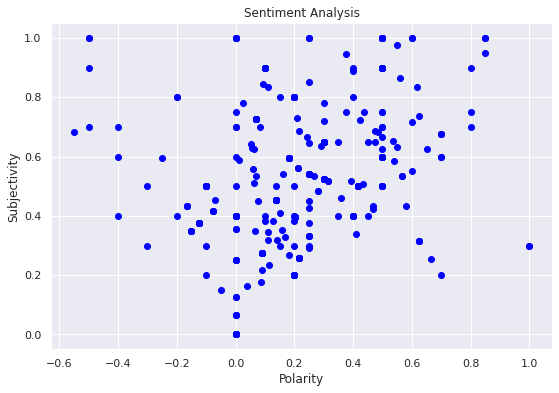

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df_ysl.shape[0]):
  plt.scatter(df_ysl['Polarity'][i], df_ysl['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()